## Import Statement

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('uber.csv')

In [14]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [15]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

## Data Preprocessing

In [16]:
df.fillna(0, inplace=True)

In [17]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

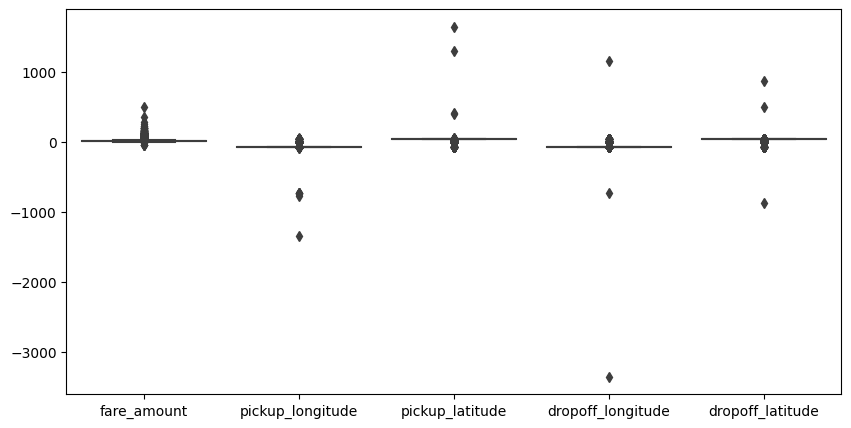

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']])
plt.show()

In [19]:
X = df.drop(columns=['key', 'pickup_datetime', 'passenger_count'])
y = df['passenger_count']

In [20]:
X

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247
...,...,...,...,...,...,...
199995,42598914,3.0,-73.987042,40.739367,-73.986525,40.740297
199996,16382965,7.5,-73.984722,40.736837,-74.006672,40.739620
199997,27804658,30.9,-73.986017,40.756487,-73.858957,40.692588
199998,20259894,14.5,-73.997124,40.725452,-73.983215,40.695415


In [21]:
y

0         1
1         1
2         1
3         3
4         5
         ..
199995    1
199996    1
199997    2
199998    1
199999    1
Name: passenger_count, Length: 200000, dtype: int64

## Splitting the dataset into Training and Testing Data

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
y_pred_linear = linear_reg_model.predict(X_test)

## Random Forest Regression

In [24]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
y_pred_rf = regr.predict(X_test)


## Model Evauation

In [25]:
from sklearn.metrics import r2_score, mean_squared_error

r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Linear Regression - R-squared:", r2_linear)
print("Linear Regression - RMSE:", rmse_linear)
print()
print("Random Forest Regression - R-squared:", r2_rf)
print("Random Forest Regression - RMSE:", rmse_rf)

Linear Regression - R-squared: -4.19591546463316e-05
Linear Regression - RMSE: 1.3042940433731267

Random Forest Regression - R-squared: 0.0006233894754409386
Random Forest Regression - RMSE: 1.3038600842586539
